In [1]:
from astrosat import AstroSat
from astrosat import Plot
from astrosat import Parameters
from astrosat import Stars

# from astropy.utils.iers import conf
# conf.auto_max_age = None


In [2]:
parameters = Parameters("params.yaml")
AS = AstroSat(parameters)
stars = Stars(parameters)

# get satellite positions
# use active satellites and visual objects (rocket bodies)
satTLEs = AS.get_TLEs('ACTIVE')
sats = AS.get_satellites(satTLEs)

satDict = AS.find_intercept_sats(Fmodel=None)

# print satellite dictionary
sat_table = AS.print_satellite_dictionary(satDict)


Using Bright Star Catalogue
Loading TLE:ACTIVE from file: 1706797171_ACTIVE.dat


Name                           Time (UTC)      Duration (s)   Mag (V)   
ARABSAT-5A                     22:00:01        9943.4         14.18     


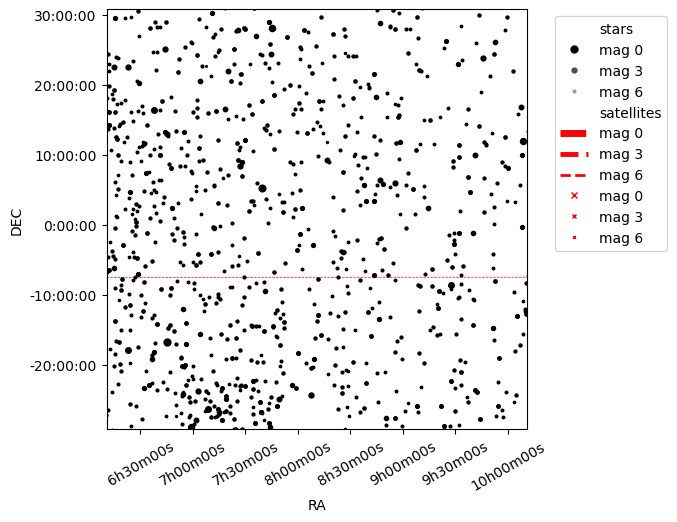

In [3]:
# plot field
plot = Plot(AS, stars)
if len(sat_table)>0:
    plot.plot_satellites(sat_table)
plot.plot_stars()
plot.plot_legend([AS.parameters.Mmin, int(round((AS.parameters.Mmin + AS.parameters.Mmax) / 3.)), 2 * int(round((AS.parameters.Mmin + AS.parameters.Mmax) / 3.))])
plot.make_plot()
plot.save_plot('skyView_%i_%i.png' % (AS.parameters.radius, AS.parameters.date.timestamp()))



In [41]:
satDict['']

{'SKYNET 4C': {'RA': [7.713396514904376,
   7.713679409052067,
   7.713963006866663,
   7.714245903974167,
   7.7145295049388105,
   7.714812404822592,
   7.715095306367282,
   7.71537891159655,
   7.715661816099961,
   7.715945424478212,
   7.71622833175681,
   7.716511240695675,
   7.716794853520135,
   7.717077765233512,
   7.717361381022665,
   7.717644295693344,
   7.717927914446857,
   7.718210832257498,
   7.718493751361344,
   7.718777374558728,
   7.719060296801889,
   7.719343220337979,
   7.719626847978282,
   7.719909774469874,
   7.720193405072753,
   7.7204763347025755,
   7.720759265624764,
   7.721042900668966,
   7.721325834728754,
   7.721608770080551,
   7.721892409565056,
   7.722175347870611,
   7.722458287834222,
   7.722741931758026,
   7.723024874491618,
   7.7233078188828905,
   7.72359146724507,
   7.723874414405645,
   7.724157363223629,
   7.724441015840034,
   7.724723967609849,
   7.725006920853542,
   7.725290577906343,
   7.725573534101195,
   7.72585649

In [3]:
from astropy.coordinates import AltAz, SkyCoord
from astropy import units as u
from astropy.coordinates import EarthLocation

In [20]:
print(sats['CALSPHERE 1'].alt)
print(sats['CALSPHERE 1'].az)

print(sats['CALSPHERE 1'].ra)
print(sats['CALSPHERE 1'].dec)

-6:43:37.2
2:41:41.0
18:05:59.21
28:23:11.4


In [14]:
sats['CALSPHERE 1'].alt

-0.11740817874670029

In [17]:
# test_sat = sats['CALSPHERE 1']
# u = ephem.unrefract(test_sat.pressure, test_sat.temperature, test.sat.alt)


AttributeError: 'ephem.EarthSatellite' object has no attribute 'observer'

In [22]:
AS.parameters.obs

<ephem.Observer date='2024/1/8 23:55:17' epoch='2000/1/1 12:00:00' lon='1:35:05.6' lat='54:46:31.1' elevation=100.00000000000001m horizon=0:00:00.0 temp=15.0C pressure=1010.0mBar>

In [24]:
test_sat.compute(AS.parameters.obs)

In [27]:
print(test_sat.ra)
print(test_sat.dec)

21:01:32.71
-76:04:55.4


In [36]:
satDict['SKYNET 4C']['Time']

[datetime.datetime(2024, 1, 8, 22, 0),
 datetime.datetime(2024, 1, 8, 22, 0, 1),
 datetime.datetime(2024, 1, 8, 22, 0, 2),
 datetime.datetime(2024, 1, 8, 22, 0, 3),
 datetime.datetime(2024, 1, 8, 22, 0, 4),
 datetime.datetime(2024, 1, 8, 22, 0, 5),
 datetime.datetime(2024, 1, 8, 22, 0, 6),
 datetime.datetime(2024, 1, 8, 22, 0, 7),
 datetime.datetime(2024, 1, 8, 22, 0, 8),
 datetime.datetime(2024, 1, 8, 22, 0, 9),
 datetime.datetime(2024, 1, 8, 22, 0, 10),
 datetime.datetime(2024, 1, 8, 22, 0, 11),
 datetime.datetime(2024, 1, 8, 22, 0, 12),
 datetime.datetime(2024, 1, 8, 22, 0, 13),
 datetime.datetime(2024, 1, 8, 22, 0, 14),
 datetime.datetime(2024, 1, 8, 22, 0, 15),
 datetime.datetime(2024, 1, 8, 22, 0, 16),
 datetime.datetime(2024, 1, 8, 22, 0, 17),
 datetime.datetime(2024, 1, 8, 22, 0, 18),
 datetime.datetime(2024, 1, 8, 22, 0, 19),
 datetime.datetime(2024, 1, 8, 22, 0, 20),
 datetime.datetime(2024, 1, 8, 22, 0, 21),
 datetime.datetime(2024, 1, 8, 22, 0, 22),
 datetime.datetime(2024,

In [4]:
import pandas

In [12]:
satellites = pandas.DataFrame(satDict)
satellites

TypeError: DataFrame.__init__() got an unexpected keyword argument 'axis'

In [10]:
satellites.filter('Az'>0, axis=0)

RA         [7.030122942132413, 7.030401496828973, 7.03067...
DEC        [-6.528116838400314, -6.527895082025575, -6.52...
MAG        [14.163106055408319, 14.163104877077242, 14.16...
Time       [2024-01-08 22:00:00, 2024-01-08 22:00:01, 202...
sunElev    [-50.43724164291943, -50.43899017134696, -50.4...
ALT        [25.0301451664078, 25.030358609819363, 25.0305...
AZ         [151.37760551839767, 151.37753721650597, 151.3...
RANGE      [39080004.0, 39079984.0, 39079964.0, 39079944....
ELEV       [35802244.0, 35802244.0, 35802244.0, 35802244....
Name: SKYNET 5B, dtype: object